In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
hbar = 6.582e-16
elec_charge = 1.602e-19

def fermi(pot, beta):
    return 1 / (1 + np.exp(pot * beta))

In [3]:
def generate_plot(
        V_gate, V_drain, V_source, epsilon_0, beta, U_0,
        gamma1 = 0.005, gamma2 = 0.005
    ):
    V_gate = np.array(V_gate).T
    V_drain = np.array([V_drain]).T

    epsilon = epsilon_0 - (V_gate + 0.5 * V_drain)

    # V is with positive sign since electron has negative charge
    f1_ = fermi(epsilon - 0.5 * U_0 + V_source, beta)
    f2_ = fermi(epsilon - 0.5 * U_0 + V_drain, beta)
    f1__ = fermi(epsilon + 0.5 * U_0 + V_source, beta)
    f2__ = fermi(epsilon + 0.5 * U_0 + V_drain, beta)

    # ratios, actual ratio calculation avoided since they might be very close to zero
    num1 = gamma1 * f1_ + gamma2 * f2_
    den1 = gamma1 * (1 - f1_) + gamma2 * (1 - f2_)
    num2 = gamma1 * f1__ + gamma2 * f2__
    den2 = gamma1 * (1 - f1__) + gamma2 * (1 - f2__)

    den_net = num1 * num2 + den1 * den2 + 2 * num1 * den2

    P_0 = den1 * den2 / den_net
    P_1 = num1 * den2 / den_net
    P_2 = num1 * num2 / den_net

    current_prop = f1_ * P_0 - (1 - f1_) * P_1 + f1__ * P_1 - (1 - f1__) * P_2

    current = 2 * elec_charge * gamma1 * current_prop / hbar 

    return V_gate, V_drain[:, 0], current

In [4]:
V_gate, V_drain, current = generate_plot(
    V_gate = [0],
    V_drain = np.linspace(0, 1, 101),
    V_source = 0,
    epsilon_0 = 0.2,
    beta = 1 / 0.025,
    U_0 = 0.25
)

Text(0, 0.5, '$I$ ($\\mu$A)')

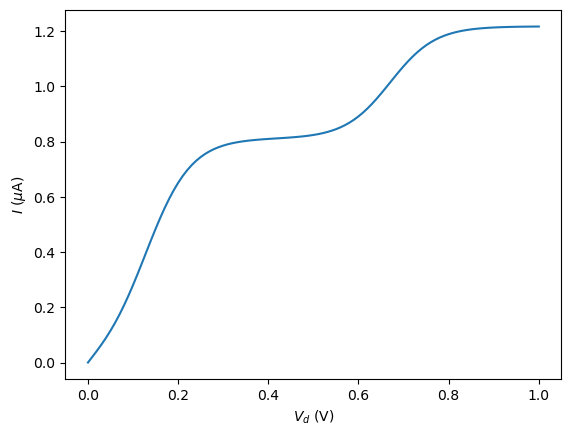

In [5]:
fig, ax = plt.subplots()

ax.plot(V_drain, current * 1e6)

ax.set_xlabel("$V_d$ (V)")
ax.set_ylabel("$I$ ($\\mu$A)")

In [13]:
V_gate, V_drain, current = generate_plot(
    V_gate = np.linspace(-1, 1, 2001),
    V_drain = np.linspace(-1, 1, 2001),
    V_source = 0,
    epsilon_0 = 0.2,
    beta = 1 / 0.005,
    U_0 = 0.25,   
)

diff_conductance = np.gradient(
    current,
    V_drain,
    axis=0
)

Text(0.5, 1.0, '$I$ ($\\mu$A)')

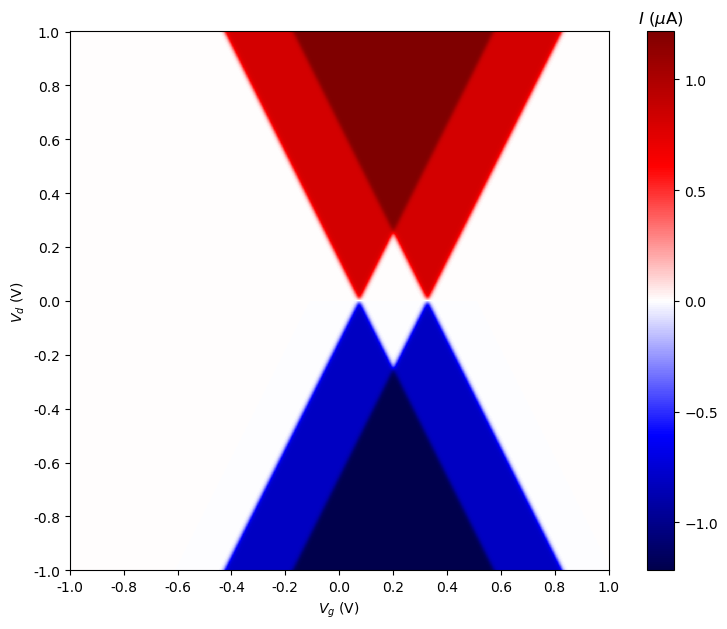

In [14]:
fig, ax = plt.subplots(figsize=(10,7))

pos = ax.imshow(current[::-1, :] * 1e6, cmap="seismic", interpolation="none")
clb = fig.colorbar(pos, ax=ax)

ax.set_xticks(np.arange(0, 11) * 200, V_gate[::200].round(2))
ax.set_xlabel("$V_{g}$ (V)")

ax.set_yticks(np.arange(0, 11) * 200, V_drain[::-200].round(2))
ax.set_ylabel("$V_{d}$ (V)")

clb.ax.set_title("$I$ ($\\mu$A)")

Text(0.5, 1.0, '$\\frac{\\partial I}{\\partial V_{d}}$ ($\\mu$A V$^{-1}$)')

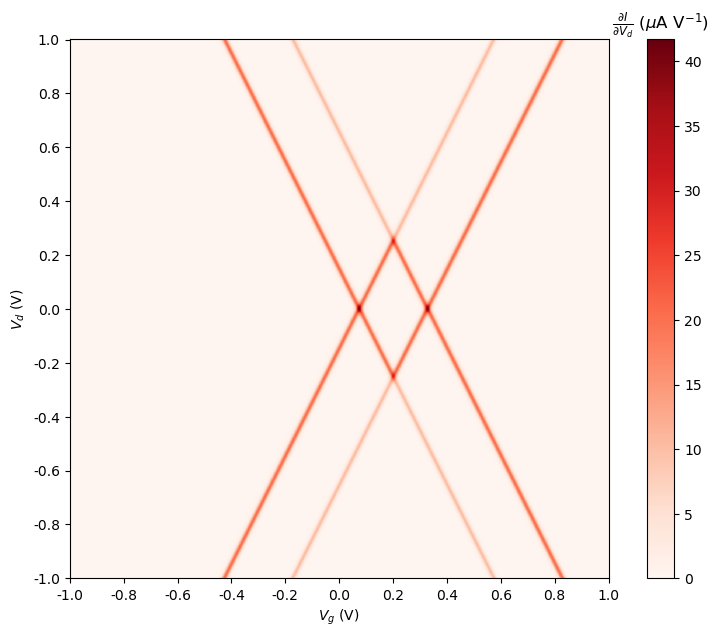

In [17]:
fig, ax = plt.subplots(figsize=(10,7))

pos = ax.imshow(diff_conductance[::-1] * 1e6, cmap="Reds", interpolation="none")
clb = fig.colorbar(pos, ax=ax)

ax.set_xticks(np.arange(0, 11) * 200, V_gate[::200].round(2))
ax.set_xlabel("$V_{g}$ (V)")

ax.set_yticks(np.arange(0, 11) * 200, V_drain[::-200].round(2))
ax.set_ylabel("$V_{d}$ (V)")

clb.ax.set_title("$\\frac{\\partial I}{\\partial V_{d}}$ ($\\mu$A V$^{-1}$)")